In [5]:
pip install pandas matplotlib seaborn nltk gensim wordcloud

In [6]:
pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 8.0 MB/s eta 0:00:00


In [7]:
import pandas as pd
import numpy as np
from gensim import corpora, models
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import re
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Ensure you have the necessary NLTK resources downloaded
nltk.download('stopwords')
nltk.download('wordnet')

# Load your data (assuming CSV format for simplicity)
df = pd.read_csv('scopus.csv')

# Ensure you're only looking at 2024 publications with sustainability-related content
df_filtered = df[df['Year'] == 2024]
df_filtered = df_filtered[df_filtered['Abstract'].str.contains('sustainability', case=False, na=False)]

# Text Preprocessing
def preprocess(text):
    # Convert to lower case
    text = text.lower()
    # Remove numbers and punctuation
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenization
    tokens = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

# Applying the preprocessing function
df_filtered['processed_abstracts'] = df_filtered['Abstract'].apply(preprocess)

# Creating the Dictionary and Corpus needed for Topic Modeling
dictionary = corpora.Dictionary(df_filtered['processed_abstracts'])
corpus = [dictionary.doc2bow(text) for text in df_filtered['processed_abstracts']]

# Build LDA model
lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=100, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)

# Display topics and words
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

# Visualization
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


(0, '0.018*"case" + 0.011*"study" + 0.009*"social" + 0.009*"marketing" + 0.008*"sustainable" + 0.008*"brand" + 0.007*"student" + 0.006*"india" + 0.006*"entrepreneurship" + 0.006*"challenge"')
(1, '0.021*"chain" + 0.020*"supply" + 0.014*"sustainability" + 0.010*"study" + 0.009*"sustainable" + 0.008*"model" + 0.008*"system" + 0.007*"industry" + 0.007*"factor" + 0.006*"framework"')
(2, '0.026*"study" + 0.018*"sustainability" + 0.012*"performance" + 0.009*"social" + 0.009*"firm" + 0.009*"environmental" + 0.008*"impact" + 0.008*"green" + 0.008*"finding" + 0.007*"practice"')
(3, '0.012*"energy" + 0.009*"water" + 0.007*"concrete" + 0.006*"farming" + 0.006*"coal" + 0.006*"efficiency" + 0.005*"crop" + 0.004*"strength" + 0.004*"co" + 0.004*"production"')
(4, '0.018*"study" + 0.018*"research" + 0.017*"sustainability" + 0.009*"business" + 0.009*"sustainable" + 0.009*"industry" + 0.008*"literature" + 0.008*"analysis" + 0.008*"technology" + 0.005*"review"')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


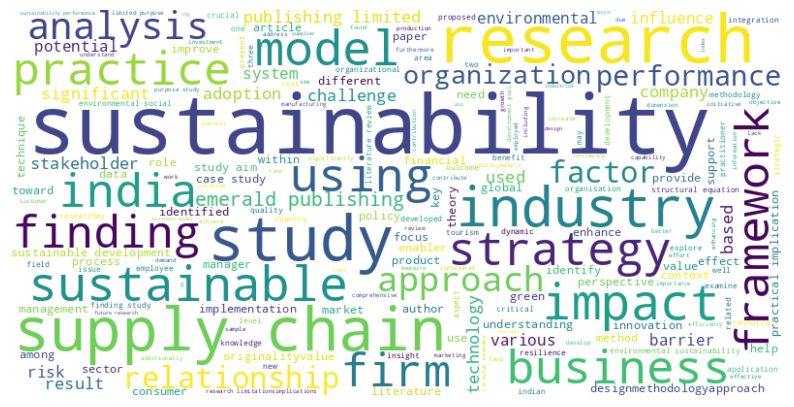

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming 'processed_abstracts' is a column in your dataframe where each entry is a list of preprocessed words
# Concatenate all the processed abstracts into a single string
text = " ".join([" ".join(abstract) for abstract in df_filtered['processed_abstracts']])

# Generate a word cloud image
wordcloud = WordCloud(background_color='white', max_words=200, contour_width=3, contour_color='steelblue', width=800, height=400).generate(text)

# Display the word cloud image using matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Don't show axes to keep it clean
plt.show()
